In [3]:
# Data set comes from kaggle's "Predict Diabetes - Analyze Diabetes Database" 
# Code largely obtained from a tensorflow tutorial
# Import libraries
from numpy import loadtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_validate


In [4]:
# Load data, but skip the header
dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)

In [5]:
# The first 8 columns are the features and the last column is the label
# I'm going to save the first 10 datums for validating the model
X_training = dataset[10:, 0:8]
y_training = dataset[10:, 8]

In [6]:
# Define the network
def create_model(num_nodes):
    model = Sequential()
    model.add(Dense(num_nodes, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [7]:
import time
neural_network = Sequential()
neural_network.add(Dense(12, input_dim=X_training.shape[1], activation='relu'))
neural_network.add(Dense(8, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid')) # Binary classification
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split the data into training and validation sets
X_training, X_value, y_training, Y_value = train_test_split(X_training, y_training, test_size=0.2, random_state=42)
start_time = time.time() # Start time before the training
history = neural_network.fit(X_training, y_training, batch_size=10, validation_data=(X_value, Y_value), epochs=500)
end_time = time.time() # End time after the training

# compute training time
total_time = end_time - start_time
average_epoch_time = total_time / 500 # as the number of epochs you ran is 500

print(f"Total training time: {total_time} seconds")
print(f"Average time per epoch: {average_epoch_time} seconds")

Epoch 1/500
61/61 [==============================] - 1s 4ms/step - loss: 4.4681 - accuracy: 0.6584 - val_loss: 2.0360 - val_accuracy: 0.6053
Epoch 2/500
61/61 [==============================] - 0s 1ms/step - loss: 1.6525 - accuracy: 0.6634 - val_loss: 1.2099 - val_accuracy: 0.6250
Epoch 3/500
61/61 [==============================] - 0s 1ms/step - loss: 1.1584 - accuracy: 0.6221 - val_loss: 0.8732 - val_accuracy: 0.6645
Epoch 4/500
61/61 [==============================] - 0s 1ms/step - loss: 0.8515 - accuracy: 0.6221 - val_loss: 0.7328 - val_accuracy: 0.6184
Epoch 5/500
61/61 [==============================] - 0s 1ms/step - loss: 0.7568 - accuracy: 0.6304 - val_loss: 0.6940 - val_accuracy: 0.6447
Epoch 6/500
61/61 [==============================] - 0s 1ms/step - loss: 0.7288 - accuracy: 0.6551 - val_loss: 0.6645 - val_accuracy: 0.6447
Epoch 7/500
61/61 [==============================] - 0s 1ms/step - loss: 0.7181 - accuracy: 0.6601 - val_loss: 0.7137 - val_accuracy: 0.6513
Epoch 8/500
6

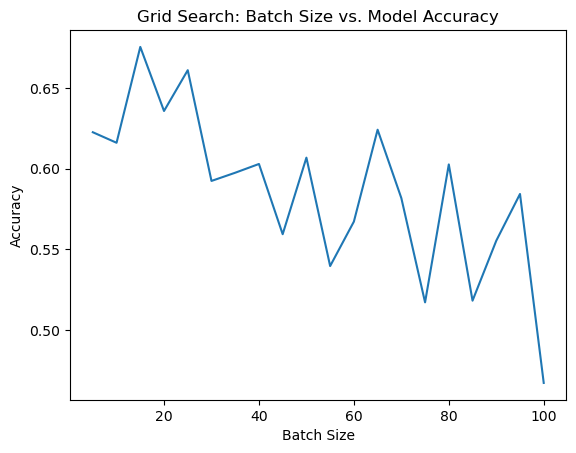

In [31]:
# batch_sizes array with at least 20 different batch sizes
batch_sizes = range(5, 105, 5)

# Lists to store the batch sizes and accuracies
batch_sizes_list = []
accuracies = []

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Grid search to optimize the batch sizes
for batch_size in batch_sizes:
    model = KerasClassifier(model=create_model, epochs=10, batch_size=batch_size, verbose=0)
    cv_results = cross_validate(model, X_training, y_training, cv=5, return_train_score=False)
    accuracy = cv_results['test_score'].mean()
    batch_sizes_list.append(batch_size)
    accuracies.append(accuracy)

# Plotting the results
plt.plot(batch_sizes_list, accuracies)
plt.title("Grid Search: Batch Size vs. Model Accuracy")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.savefig("grid_search_batch_size_results.png")
plt.show()


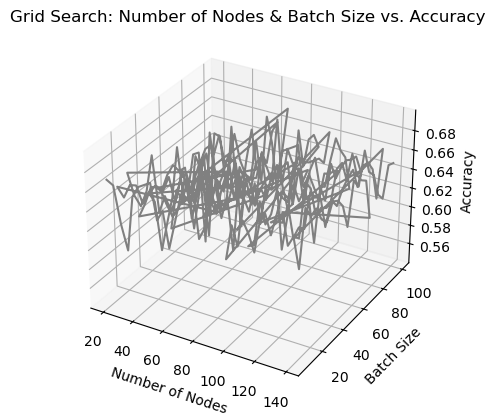

In [33]:
# Range of nodes and batch sizes to search over
nodes_range = range(20, 140, 7)
batch_sizes = range(5, 105, 5)

# Lists to store the values of nodes, batch sizes, and accuracies
nodes_values = []
batch_sizes_list = []
accuracies = []

# Function to create the model
def create_model(num_nodes):
    model = Sequential()
    model.add(Dense(num_nodes, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Nested grid search to optimize the number of nodes in the first layer and the batch size
for num_nodes in nodes_range:
    for batch_size in batch_sizes:
        model = KerasClassifier(model=create_model, num_nodes=num_nodes, 
                                epochs=10, batch_size=batch_size, verbose=0)
        cv_results = cross_validate(model, X_training, y_training, cv=5, return_train_score=False)
        accuracy = cv_results['test_score'].mean()
        nodes_values.append(num_nodes)
        batch_sizes_list.append(batch_size)
        accuracies.append(accuracy)

# Convert the lists to a 3D numpy array for plotting
data = np.array([nodes_values, batch_sizes_list, accuracies])

# 3D Plotting the results
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = data[2]
xline = data[0]
yline = data[1]
ax.plot3D(xline, yline, zline, 'gray')

ax.set_title("Grid Search: Number of Nodes & Batch Size vs. Accuracy")
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Batch Size")
ax.set_zlabel("Accuracy")

plt.savefig("grid_search_3D_results.png")
plt.show()


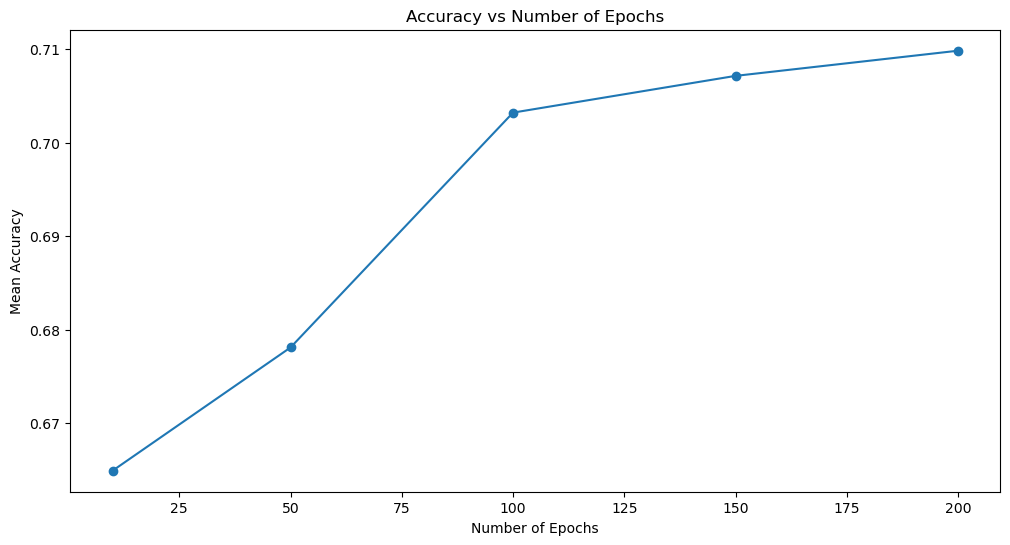

Best: 0.709810 using {'epochs': 200}


In [12]:
# summarize results
plt.figure(figsize=(12, 6))
plt.plot(epochs, means, 'o-')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs Number of Epochs')
plt.show()

# Print best number of epochs and the corresponding accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


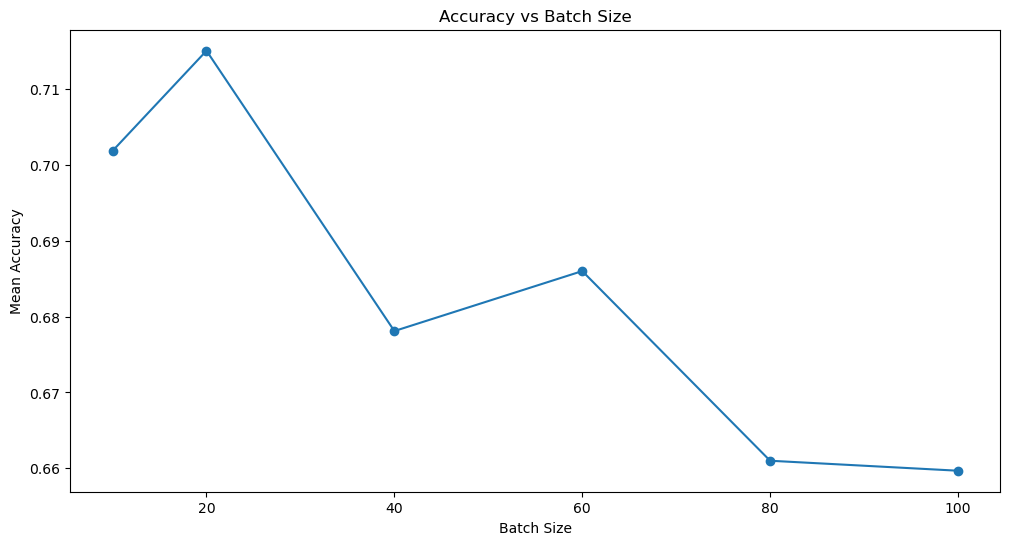

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(batch_size, means, 'o-')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs Batch Size')
plt.show()

In [6]:
# Train the network
history = neural_network.fit(X_training, y_training, epochs=150, batch_size=10)

Epoch 1/150
76/76 [==============================] - 1s 1ms/step - loss: 2.5825 - accuracy: 0.6359
Epoch 2/150
76/76 [==============================] - 0s 1ms/step - loss: 0.9522 - accuracy: 0.6412
Epoch 3/150
76/76 [==============================] - 0s 1ms/step - loss: 0.7658 - accuracy: 0.6794
Epoch 4/150
76/76 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6887
Epoch 5/150
76/76 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.7045
Epoch 6/150
76/76 [==============================] - 0s 985us/step - loss: 0.6216 - accuracy: 0.7071
Epoch 7/150
76/76 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.7164
Epoch 8/150
76/76 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.7150
Epoch 9/150
76/76 [==============================] - 0s 956us/step - loss: 0.6053 - accuracy: 0.7177
Epoch 10/150
76/76 [==============================] - 0s 930us/step - loss: 0.5896 - accuracy: 0.7164
Epo

Text(0.5, 0, 'epoch')

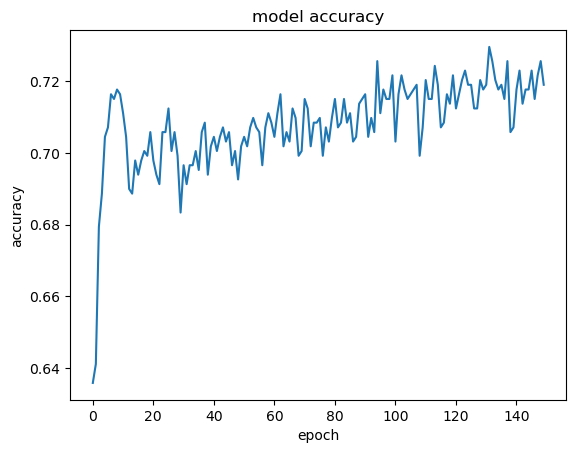

In [7]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [8]:
# Test it out
X_validate = dataset[:10,:8]
y_validate = dataset[:10,8]
# make class predictions with the model
predictions = (neural_network.predict(X_validate) > 0.5).astype(int)
# List out the results from our 10 saved datums
for i in range(10):
 print('%s => %d (expected %d)' % (X_validate[i].tolist(), predictions[i], y_validate[i]))
 

1/1 [==============================] - 0s 72ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


/var/folders/2b/1qyr4kcd0133yd32t6r09ydm0000gn/T/ipykernel_36279/92781441.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X_validate[i].tolist(), predictions[i], y_validate[i]))


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


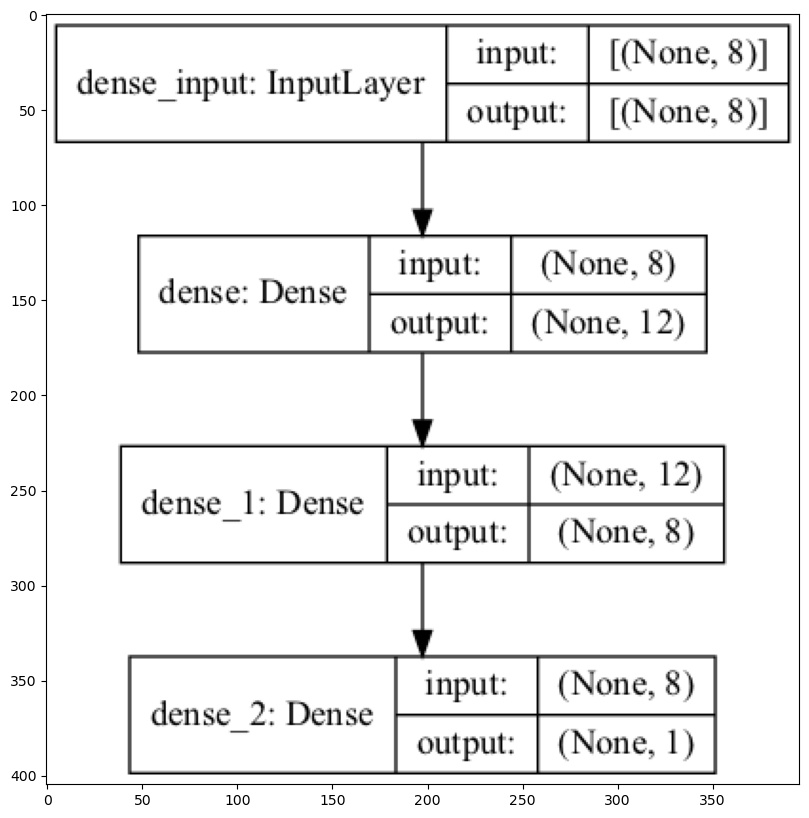

In [9]:
# Plot the model and save the plot to a file

plot_model(neural_network, to_file='model.png', show_shapes=True, show_layer_names=True)

# Load the image file
img = mpimg.imread('model.png')

# Display the image
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()


In [10]:
penguin_data = pd.read_csv('penguins_size.csv')

# Drop the rows with missing values
penguin_data = penguin_data.dropna()  
penguin_data.isna().sum() # Check for missing values

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
# preprocessing the data
# Create separate LabelEncoders
label_encoder_species = LabelEncoder()
label_encoder_island = LabelEncoder()
label_encoder_sex = LabelEncoder()

# Fit and transform for each categorical column
penguin_data['species'] = label_encoder_species.fit_transform(penguin_data['species'])
penguin_data['island'] = label_encoder_island.fit_transform(penguin_data['island'])
penguin_data['sex'] = label_encoder_sex.fit_transform(penguin_data['sex'])


In [21]:
# Split the data into training and testing sets
# Assuming 'sex' is the target feature and the model is a binary classification
X = penguin_data.drop(columns=['sex']).values # Features: everything except 'sex'
Y = penguin_data['sex'].values # Target: 'sex'
print(np.unique(Y))
X_training, X_value, Y_training, Y_value = train_test_split(X, Y, test_size=0.1)


[0 1 2]


In [1]:
# using the same network as before from the diabetes
# Training the model 
import time
neural_network = Sequential()
neural_network.add(Dense(12, input_dim=X_training.shape[1], activation='relu'))
neural_network.add(Dense(8, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid')) # Binary classification
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start_time = time.time() # Start time before the training
history = neural_network.fit(X_training, Y_training, batch_size=10, validation_data=(X_value, Y_value), epochs=500)
end_time = time.time() # End time after the training

# compute training time
total_time = end_time - start_time
average_epoch_time = total_time / 500 # as the number of epochs you ran is 500

print(f"Total training time: {total_time} seconds")
print(f"Average time per epoch: {average_epoch_time} seconds")

NameError: name 'Sequential' is not defined

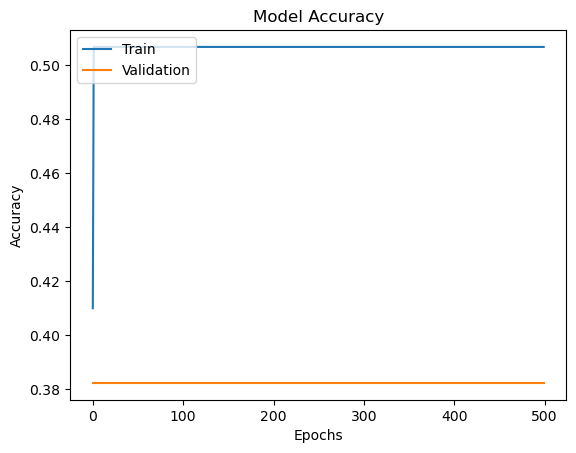

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')

In [18]:
# updated network
from tensorflow.keras.layers import Dropout

neural_network = Sequential()
neural_network.add(Dense(32, input_dim=X_training.shape[1], activation='relu'))
neural_network.add(Dropout(0.5)) # 50% dropout rate
neural_network.add(Dense(24, activation='relu'))
neural_network.add(Dropout(0.5)) # 50% dropout rate
neural_network.add(Dense(8, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid'))
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam

# Creating the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compiling the model
neural_network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fitting data with smaller batch size
history = neural_network.fit(X_training, Y_training, batch_size=8, validation_data=(X_value, Y_value), epochs=500)


Epoch 1/500
38/38 [==============================] - 1s 6ms/step - loss: 525.3990 - accuracy: 0.2033 - val_loss: -245.8060 - val_accuracy: 0.3824
Epoch 2/500
38/38 [==============================] - 0s 2ms/step - loss: -539.9664 - accuracy: 0.4500 - val_loss: -1201.5852 - val_accuracy: 0.3824
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: -1695.4222 - accuracy: 0.4767 - val_loss: -3285.5566 - val_accuracy: 0.3824
Epoch 4/500
38/38 [==============================] - 0s 2ms/step - loss: -3941.4871 - accuracy: 0.5067 - val_loss: -7298.2891 - val_accuracy: 0.3824
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: -9423.6719 - accuracy: 0.5067 - val_loss: -16700.5781 - val_accuracy: 0.3824
Epoch 6/500
38/38 [==============================] - 0s 2ms/step - loss: -21411.0527 - accuracy: 0.5067 - val_loss: -36396.2734 - val_accuracy: 0.3824
Epoch 7/500
38/38 [==============================] - 0s 2ms/step - loss: -42804.4648 - accuracy: 0.5067 - v

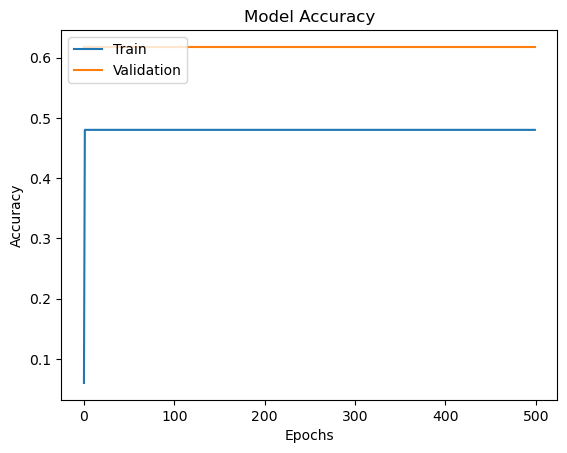

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')